In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

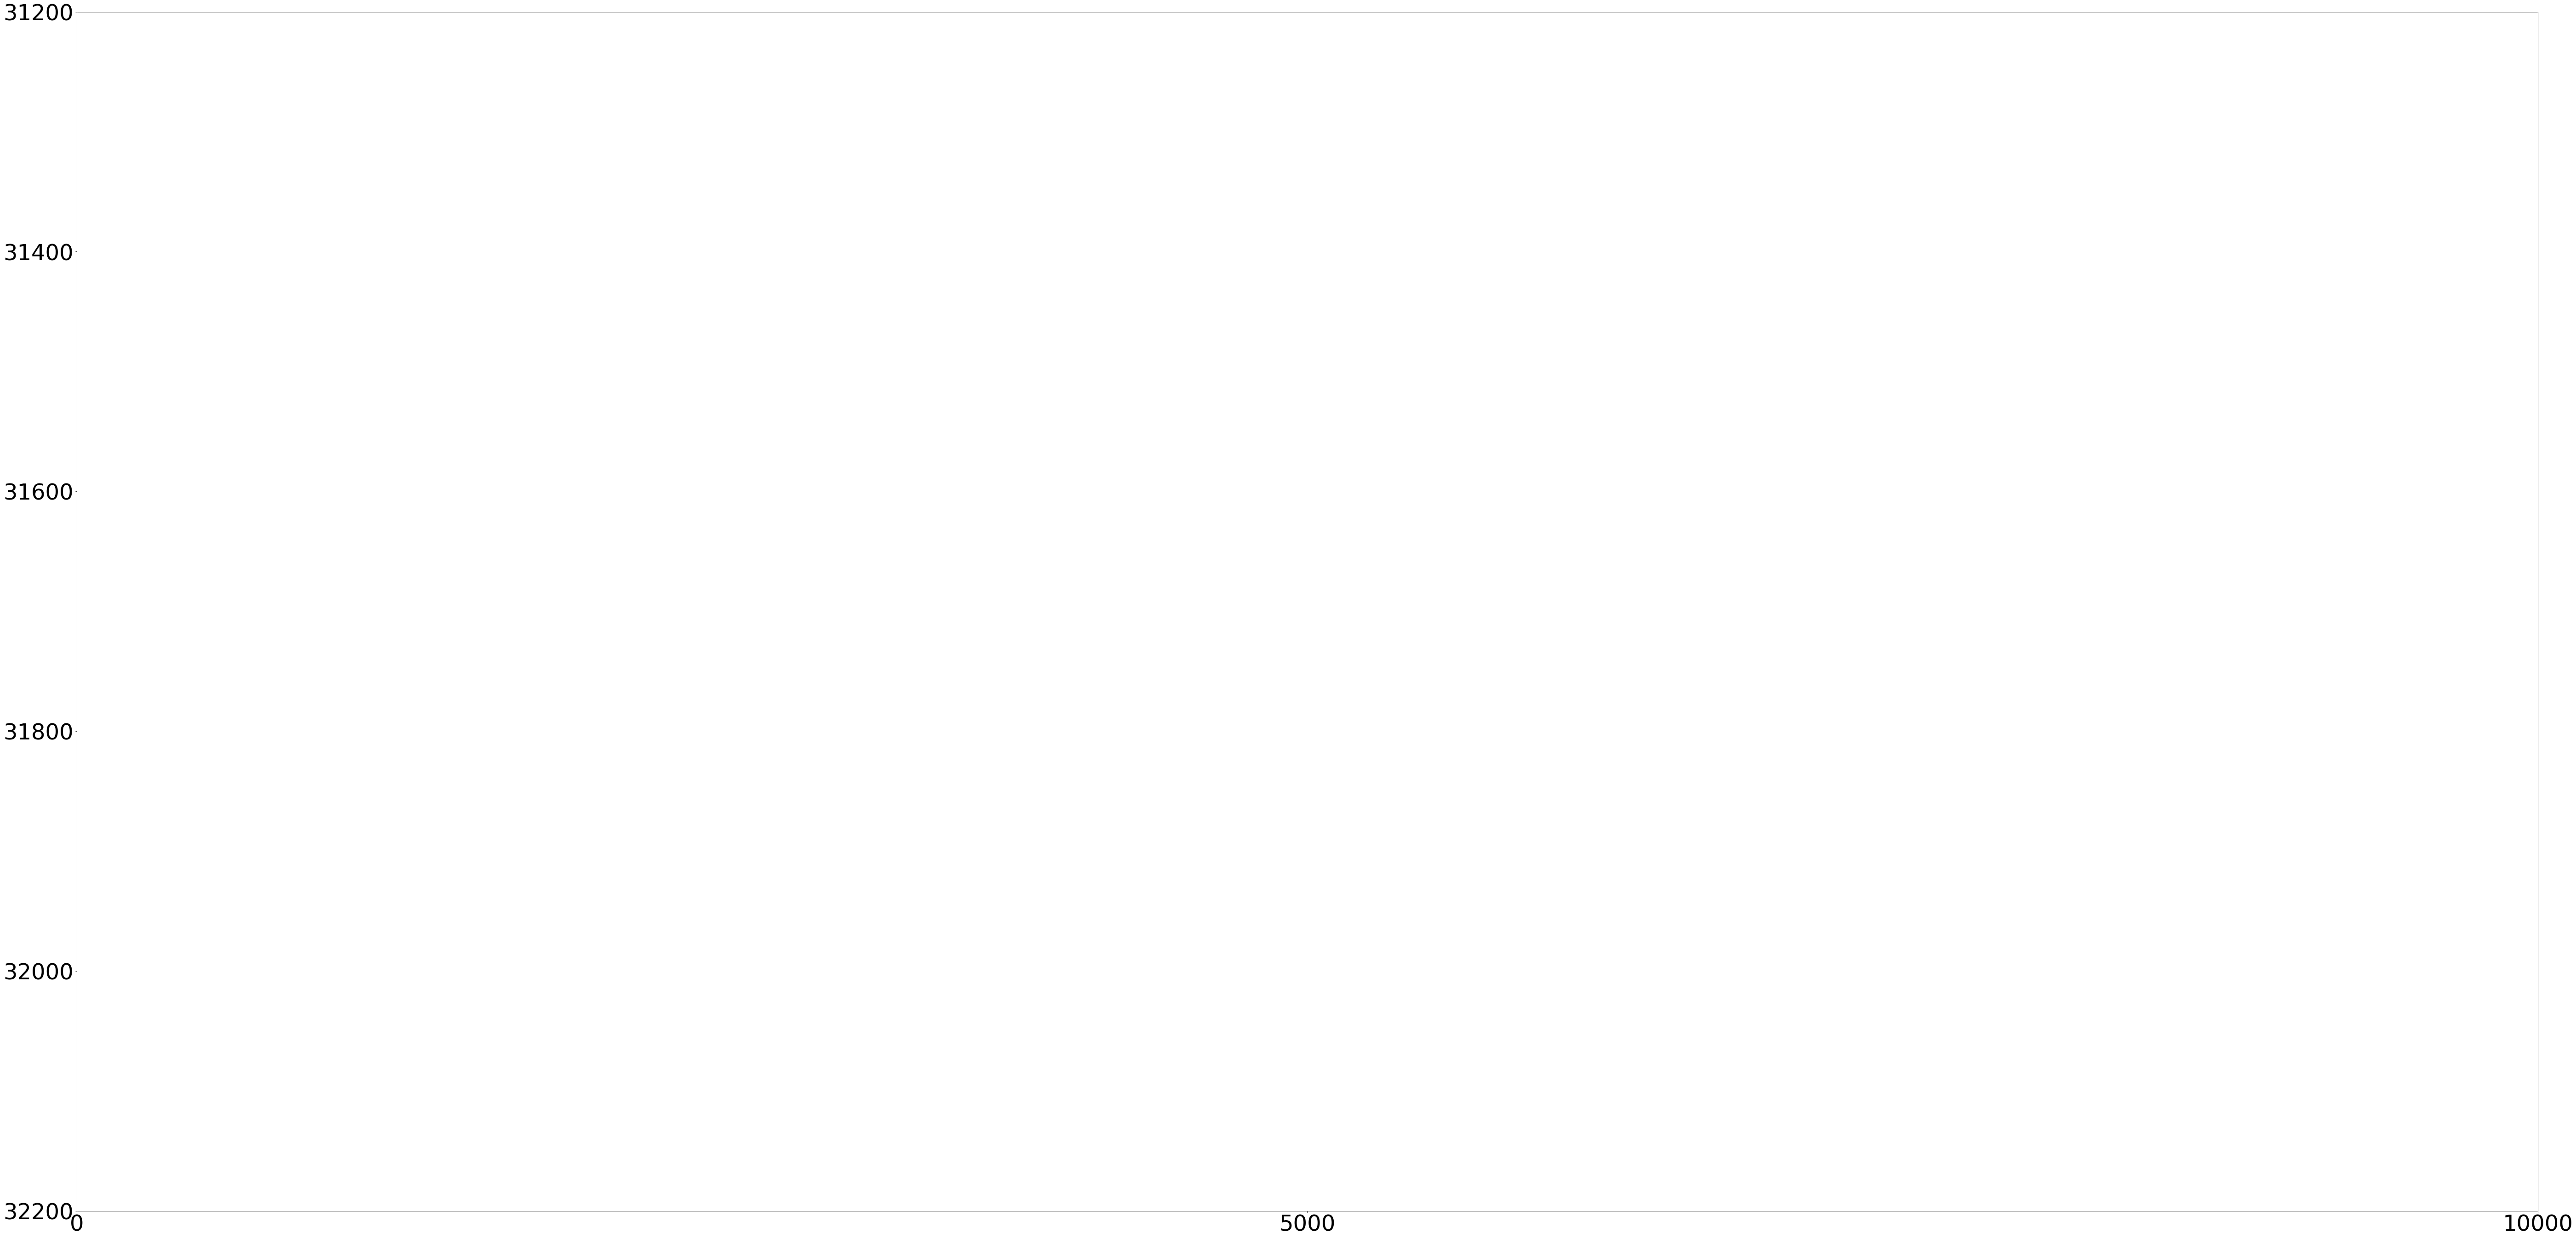

In [2]:
#------------------------------------------------------------------------------
# load data from S1 data file 
#------------------------------------------------------------------------------
import pickle

with open('../data/v8_batch1/v8_batch1_0_0_data.pkl', 'rb') as fileObj: spikesData = pickle.load(fileObj)

spkid = spikesData['simData']['spkid']
spkt = spikesData['simData']['spkt']

from matplotlib import pyplot as plt

plt.figure(figsize=(96,48))
fontSize = 48
lw = 2

plt.plot(spkt,spkid,'.b')

plt.ylim(32200,31200)
plt.xlim(0, 10000)
# plt.xlabel('Frequency [Hz]', fontsize = fontSize)
# plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([0,5000,10000], fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [4]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss


poptypeNumber = 61 # max 55 + 6
celltypeNumber = 213 # max 207 + 6

# TO DEBUG - import and simulate only the Cell soma (to study only the Net)
reducedtest = False    

#------------------------------------------------------------------------------  
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
popParam = []
cellParam = []
meParamLabels = {} 
popLabelEl = {} 
cellLabel = {}

RP_L13 = []
RP_L45 = []
RP_L6 = []

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

    if mtype not in popParam:
        popParam.append(mtype)
        popLabelEl[mtype] = [] 
               
    popLabelEl[mtype].append(metype)
    
    cellParam.append(mtype + '_' + etype[0:3])

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 1.0:
        if int(layernumber) <= 3:
            RP_L13.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        elif int(layernumber) == 6:
            RP_L6.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
        else:
            RP_L45.append(mtype + '_' + etype[0:3])
#             print(layernumber,int(layernumber),mtype + '_' + etype[0:3])
    
S1pops = popParam[0:55]
S1cells = cellParam[0:207]

In [5]:
filenames = ['../data/v8_batch1/v8_batch1_%d_%d_data.pkl' % (iseed, cseed) for iseed in [0] for cseed in [0]]
timeRange = [2000, 10000]

allData = []

for filename in filenames:
    sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


    # standardd plots
    # sim.analysis.plotRaster(**{'include': ['allCells'], 'saveFig': True, 'showFig': False, 'labels': False, 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L13, 'saveFig': filename[:-4]+'_RP_L13', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L45, 'saveFig': filename[:-4]+'_RP_L45', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotRaster(**{'include': RP_L6, 'saveFig': filename[:-4]+'_RP_L6', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':16, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
    # sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 31500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_30sec')
    #sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 6500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_5sec')
    #sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': ['avg', [0], [1], [2,3,4,5,6,7,8,9], [10, 11, 12], [13], [14, 15], [16,17,18,19]], 'timeRange': timeRange, 'maxFreq': 50, 'figSize': (8,24), 'saveData': False, 'saveFig': filename[:-4]+'_LFP_spec_7s_all_elecs', 'showFig': False})
#     sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': 
#             [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
#             'timeRange': timeRange, 
#             'figSize': (12,6), 'saveFig': True, 'showFig': False})

#     out = sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
#             'electrodes': 
#             [8], #'avg', 
#             'timeRange': timeRange, 
#             'maxFreq': 400, 
#             'figSize': (16,12), 
#             'saveData': False, 
#             'saveFig': True, 'showFig': False})

#     sim.analysis.plotLFP(**{'plots': ['PSD'], 
#             'electrodes': 
#             [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
#             'timeRange': timeRange, 
#             'maxFreq': 400, 
#             'figSize': (5,5), 
#             'saveData': False, 
#             'saveFig': True, 'showFig': False})

    # out = sim.analysis.plotLFP(**{'plots': ['locations'], 
    #         'figSize': (48,48), 
    #         'saveData': False, 
    #         'saveFig': filename[:-4]+'_locations_3layers', 'showFig': False, 'dpi': 300})


Start time:  2022-04-13 20:57:17.239756
Loading file ../data/v8_batch1/v8_batch1_0_0_data.pkl ... 
  Done; file loading time = 25.24 s
Loading simConfig...
Loading netParams...
Loading net...
  Created 32127 cells
  Created 0 connections
  Created 7810 stims
  Done; re-instantiate net time = 89.68 s
Loading simData...
Recording 0 traces of 0 types on node 0


In [ ]:
sim.analysis.plotLFP(**{'plots': ['timeSeries'], 'electrodes': [7],
#         [[0,1,2,3],[4,5,6,7,8,9,10,11]], #'avg', 
        'timeRange': [2000,10000], 
        'figSize': (36,12), 'saveFig': True, 'showFig': False})

In [ ]:
sim.analysis.plotLFP(**{'plots': ['PSD'], 
            'electrodes': [7], #'avg', 
            'timeRange': [2000,10000], 
            'maxFreq': 400, 
            'figSize': (5,5), 
            'saveData': False, 
            'saveFig': True, 'showFig': False})

In [ ]:
sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
            'electrodes': 
            [7], #'avg', 
            'timeRange': [2000,10000], 
            'maxFreq': 400, 
            'figSize': (16,12), 
            'saveData': False, 
            'saveFig': True, 'showFig': False})

In [ ]:
sim.plotting.plotSpikeHist(include=[S1cells],timeRange = timeRange, binSize = 10, density = True, legend = False)

In [ ]:
import numpy as np

In [ ]:
np.shape(sim.allSimData['LFP'])

In [ ]:
V = {}
for el in range(12):
    V[el] = []
Vm = []

for t in range(20000,100000):
    vmt = 0
    for el in range(12):
        V[el].append(sim.allSimData['LFP'][t][el])
        if el >= 4:
            vmt += sim.allSimData['LFP'][t][el]/8
    Vm.append(vmt)

In [ ]:
timeRange = [2000, 10000]
recordStep = 0.1
t = np.arange(timeRange[0], timeRange[1], recordStep) 

In [ ]:
plt.figure(figsize=(24,12))
fontSize = 12
lw = 1

for el in range(4,8):
    plt.subplot(4, 1, el+1-4)
    plt.plot(t,V[el], linewidth=lw) #, color=color)
    plt.plot(t,Vm, linewidth=lw) #, color=color)
    plt.ylabel(str(el), fontsize=fontSize)
    plt.xlim(2000,5000)
    plt.ylim(-.5,0.1)
        

plt.xlabel('Time (ms)', fontsize=fontSize)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08, top=0.92)

In [ ]:
x = Vm
fs = 1000/recordStep

f, Pxx_den = ss.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-10, 2e-3])
plt.xlim([0.5, 401])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
fontSize = 24
lw = 2

fs = 1000/recordStep
x = V[8]
f, Pxx_den = ss.welch(x, fs, nperseg=2048)
plt.semilogy(f, Pxx_den, linewidth=4)
f, Pxx_den = ss.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=512)
plt.semilogy(f, Pxx_den, linewidth=4)
plt.ylim(0.4e-7, 2e-4)
plt.xlim(1, 400)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
fontSize = 24
lw = 2


fs = 1000/recordStep
x = Vm
f, Pxx_den = ss.welch(x, fs, nperseg=2048)
plt.semilogy(f, Pxx_den, linewidth=4)
f, Pxx_den = ss.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den, linewidth=2)
f, Pxx_den = ss.welch(x, fs, nperseg=512)
plt.semilogy(f, Pxx_den, linewidth=4)
plt.ylim(0.4e-7, 2e-4)
plt.xlim(1, 400)
plt.xlabel('Frequency [Hz]', fontsize = fontSize)
plt.ylabel('PSD [V**2/Hz]', fontsize = fontSize)
plt.xticks([1,200,400], fontsize = fontSize)
plt.yticks(fontsize = fontSize)
plt.show()

In [ ]:
import matplotlib.mlab as mlab

fs = 10000

fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True)
xticks = np.arange(1, 502, 100)
xrange = (xticks[0], xticks[-1])


ax0.psd(x, NFFT=3001, Fs=fs, window=mlab.window_none,
        scale_by_freq=True)
ax0.set_title('Periodogram')
ax0.set_xticks(xticks)
ax0.set_xlim(xrange)

ax1.psd(x, NFFT=1500, Fs=fs, window=mlab.window_none, noverlap=75,
        scale_by_freq=True)
ax1.set_title('Welch')
ax1.set_xticks(xticks)
ax1.set_xlim(xrange)

plt.show()

In [24]:
import numpy as np

In [42]:
np.shape(posL23PC[1]['posX'])

(121,)

Plotting 2D representation of network cell locations and connections...


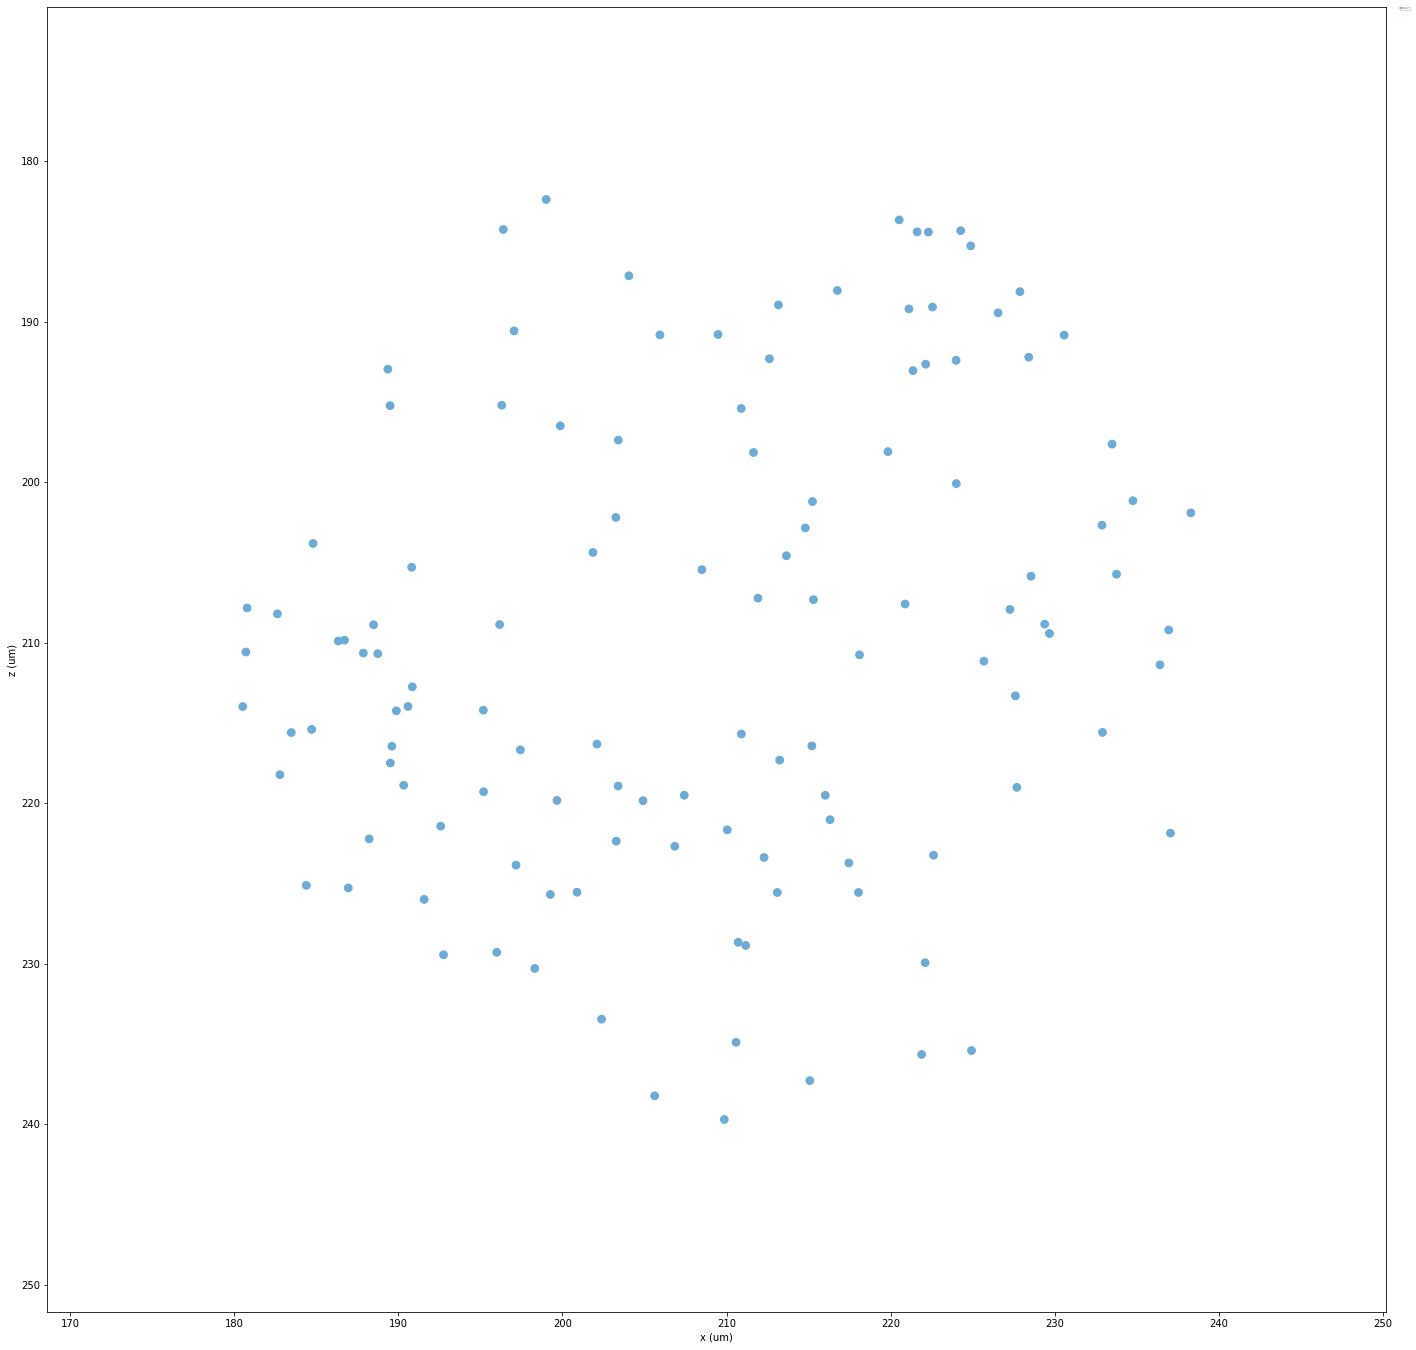

In [41]:
posL23PC = sim.analysis.plot2Dnet(**{'include': ['L23_PC_cAD'], 'view': 'xz','saveFig': False, 'showConns': False, 'fontSize':1, 'figSize':(24, 24)})

In [6]:
cellsTags = []
N =31346
for i,metype in enumerate(spikesData['net']['cells']):
    if i < N:
        cellsTags2 = {}
        for tp in ['pop', 'xnorm', 'ynorm', 'znorm', 'x', 'y', 'z']:
            cellsTags2[tp] = metype.tags[tp]            
        cellsTags.append(cellsTags2)


In [ ]:
metype.tags['xnorm'] = metype['xnorm']
metype.tags['ynorm'] = metype['ynorm']
metype.tags['znorm'] = metype['znorm']
metype.tags['x'] = metype['x']
metype.tags['y'] = metype['y']
metype.tags['z'] = metype['z']   

In [9]:
cellsTags[0]['xnorm']

0.2626944415792011

In [4]:
color0 = {}

for metype in spikesData['net']['pops'].keys():
    if 'L' == metype[0]:
        if '2' == metype[1] or '5' == metype[1]:
            color0[metype]= 'blue'
        else:
            color0[metype]= 'red'
    else:
        if 'n_L23_' in metype or 'n_L5_' in metype:
            color0[metype]= 'cyan'
        else:
            color0[metype]= 'orange'

sim.analysis.plot2Dnet(**{'include':spikesData['net']['pops'].keys(), 'popColors': color0, 'saveFig': False, 'showConns': False, 'fontSize':1, 'figSize':(24, 24)});
sim.analysis.plot2Dnet(**{'include':spikesData['net']['pops'].keys(), 'popColors': color0, 'view': 'xz','saveFig': False, 'showConns': False, 'fontSize':1, 'figSize':(24, 24)});

NameError: name 'sim' is not defined

In [3]:
spikesData['net']['pops'].keys()

odict_keys(['presyn_L1_DAC_bNA', 'presyn_L1_DAC_cNA', 'presyn_L1_DLAC_cNA', 'presyn_L1_HAC_bNA', 'presyn_L1_HAC_cIR', 'presyn_L1_HAC_cNA', 'presyn_L1_NGC-DA_bNA', 'presyn_L1_NGC-DA_cAC', 'presyn_L1_NGC-DA_cNA', 'presyn_L1_NGC-DA_cST', 'presyn_L1_NGC-SA_cNA', 'presyn_L1_SLAC_bNA', 'presyn_L1_SLAC_cAC', 'presyn_L1_SLAC_cNA', 'presyn_L23_BP_bAC', 'presyn_L23_BP_bIR', 'presyn_L23_BP_bNA', 'presyn_L23_BP_cAC', 'presyn_L23_BP_cNA', 'presyn_L23_BP_dST', 'presyn_L23_BTC_bAC', 'presyn_L23_BTC_bIR', 'presyn_L23_BTC_bNA', 'presyn_L23_BTC_cAC', 'presyn_L23_BTC_cNA', 'presyn_L23_ChC_cAC', 'presyn_L23_ChC_cNA', 'presyn_L23_ChC_dNA', 'presyn_L23_DBC_bAC', 'presyn_L23_DBC_bIR', 'presyn_L23_DBC_bNA', 'presyn_L23_DBC_cAC', 'presyn_L23_LBC_bAC', 'presyn_L23_LBC_bNA', 'presyn_L23_LBC_cAC', 'presyn_L23_LBC_cNA', 'presyn_L23_LBC_cST', 'presyn_L23_LBC_dNA', 'presyn_L23_MC_bAC', 'presyn_L23_MC_bNA', 'presyn_L23_MC_cAC', 'presyn_L23_MC_cNA', 'presyn_L23_MC_dNA', 'presyn_L23_NBC_bAC', 'presyn_L23_NBC_bNA', 'pre

In [ ]:
spikesData.keys()